# Numberlink

---
## Setup

### Import libraries

In [1]:
# Import necessary libraries
from typing import Dict, List, Tuple

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from seaborn import heatmap

### Define the Numberlink puzzle class

In [2]:
class Numberlink:
    '''Properties:
    
            paper:
                Stores the puzzle paper in the form of
                a 2D array, where 0's represents empty cells
                and other integers represents the number.
            
            ends:
                Stores the end-points of each number that appears
                in the puzzle paper when creating a `Numberlink`
                instance.

                The key is the number and the value is a list
                of tuples representing the coordinates of the
                end points.
                
                E.g.
                ```
                {
                    1: [(0, 0), (2, 1)],
                    2: [(1, 1), (2, 0)],
                }
                ```
                means that the number 1 has end-points at
                `(0, 0)` and `(2, 1)` and the number 2 has end-
                points at `(1, 1)` and `(2, 0)`.
            
            shape:
                Represents the shape of the puzzle paper in the
                form of a tuple `({height}, {width})`.

            cmap:
                The colormap used in Heatmap to display
                the puzzle paper.
            
            nNumber:
                The count of numbers in the puzzle paper.
    '''
    def __init__(self, paper: np.ndarray):
        self.paper = paper
        self.ends : Dict[int, List[Tuple[int, int]]] = {}
        (height, width) = paper.shape
        for i in range(height):
            for j in range(width):
                pos = (i, j)
                if paper[pos]:
                    if paper[pos] not in self.ends:
                        self.ends[paper[pos]] = [pos]
                    else:
                        self.ends[paper[pos]].append(pos)
    @property
    def shape(self):
        return self.paper.shape
    @property
    def cmap(self):
        hsv = plt.get_cmap('hsv')
        colors = [(1, 1, 1)] + [hsv(i) for i in range(1, 256)]
        return LinearSegmentedColormap.from_list("my_cmap", colors, N=256)
    @property
    def nNumber(self):
        return len(self.ends)

### Define the directions

In [3]:
# Define the directions used to calculate neighbor positions
LEFT = (0, -1)
RIGHT = (0, 1)
UP = (-1, 0)
DOWN = (1, 0)
DIRECTIONS = (RIGHT, DOWN, LEFT, UP)

### Define helper functions

In [4]:
def getNextPos(width: int, pos: Tuple[int, int]) -> Tuple[int, int]:
    ''' Get the next position to be colored in a row-major order
        width: Width of the puzzle paper
        pos: Current position
        return: Next position to be colored
    '''
    (x, y) = pos
    return (x, y + 1) if y + 1 < width else (x + 1, 0)


def getNeighborPos(pos: Tuple[int, int], direction: Tuple[int, int]) -> Tuple[int, int]:
    ''' Get the position of the neighbor cell in the given direction
        pos: Position of the current cell
        direction: Direction to the current cell
        return: Position of the neighbor cell
    '''
    return (pos[0] + direction[0], pos[1] + direction[1])


def isInBorder(pos: Tuple[int, int], shape: Tuple[int, int]) -> bool:
    ''' Check if a position is in the border of the paper
        pos: Position to check
        shape: Shape of the puzzle paper
        return: True if the position is in the border, False otherwise
    '''
    return pos[0] >= 0 and pos[0] < shape[0] and pos[1] >= 0 and pos[1] < shape[1]


def countNeighbors(puzzle: Numberlink, pos: Tuple[int, int]) -> int:
    ''' Count the number of filled neighbors of a grid (including border)
        puzzle: A Numberlink puzzle
        pos: The position to count filled neighbors
        return: Count of filled neighbors including borders
    '''
    count = 0
    for direction in DIRECTIONS:
        neighbor = getNeighborPos(pos, direction)
        # Count border OR non-empty neighbor
        if not isInBorder(neighbor, puzzle.shape) or puzzle.paper[neighbor] != 0:
            count += 1
    return count


def showPaper(puzzle: Numberlink):
    ''' Display the paper corresponding to the puzzle where
        different colors represent different numbers in that
        and ONLY end-points are annotated by their numbers
        puzzle: A Numberlink puzzle
        Output: Heatmap grid of the puzzle with markers
    '''
    (height, width) = puzzle.shape
    normalized_paper = 255 * (puzzle.paper / puzzle.nNumber)
    paper = [
        [k if k != 0 and (x, y) in puzzle.ends[k] else ""
         for y, k in enumerate(row)]
         for x, row in enumerate(puzzle.paper)
    ]
    
    f = plt.figure(figsize = (width,height))
    heatmap(normalized_paper, vmin = 0, vmax = 255,
            cmap = puzzle.cmap, annot=paper, fmt="s",
            annot_kws={"size": 20}, linecolor="black",
            linewidths=0.2, cbar = False, xticklabels=False,
            yticklabels=False)

---
## Create sample puzzles

Puzzle of dimensions (3, 3)


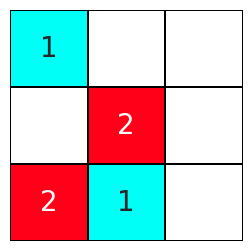

In [5]:
# Sample puzzle 1 (3x3)
paper = np.array(
          [[1, 0, 0],
           [0, 2, 0],
           [2, 1, 0]]
        )
puzzle1 = Numberlink(paper)

# Print the dimensions of puzzle
print("Puzzle of dimensions", puzzle1.shape)
# Display the puzzle paper
showPaper(puzzle1)

Puzzle of dimensions (4, 4)


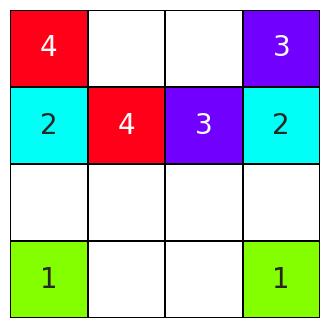

In [6]:
# Sample puzzle 2 (4x4)
paper = np.array(
          [[4, 0, 0, 3],
           [2, 4, 3, 2],
           [0, 0, 0, 0],
           [1, 0, 0, 1]]
        )
puzzle2 = Numberlink(paper)

# Print the dimensions of puzzle
print("Puzzle of dimensions", puzzle2.shape)
# Display the puzzle paper
showPaper(puzzle2)

Puzzle of dimensions (6, 6)


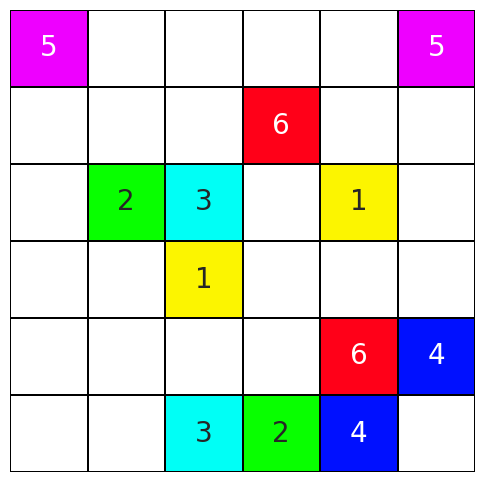

In [7]:
# Sample puzzle 3 (6x6)
paper = np.array(
          [[5, 0, 0, 0, 0, 5],
           [0, 0, 0, 6, 0, 0],
           [0, 2, 3, 0, 1, 0],
           [0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 6, 4],
           [0, 0, 3, 2, 4, 0]]
        )
puzzle3 = Numberlink(paper)

# Print the dimensions of puzzle
print("Puzzle of dimensions", puzzle3.shape)
# Display the puzzle paper
showPaper(puzzle3)

Puzzle of dimensions (9, 9)


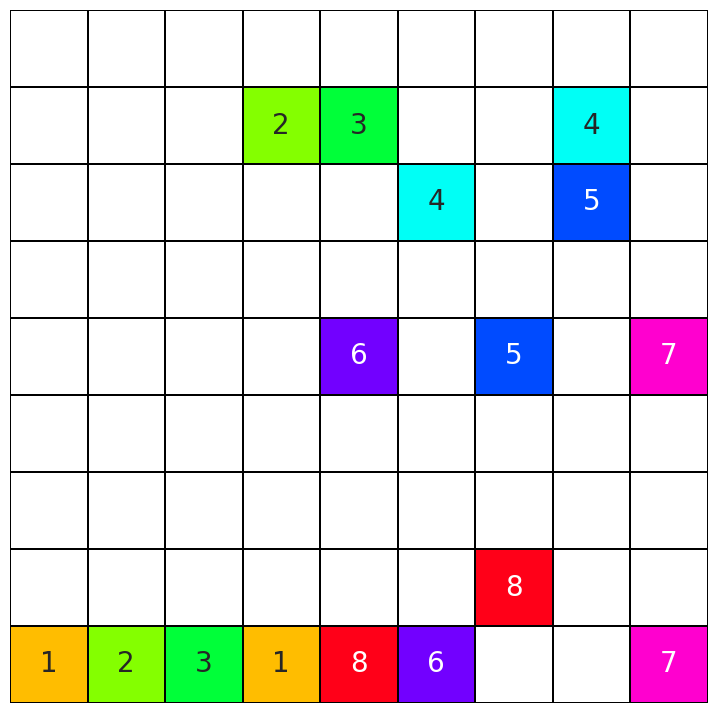

In [8]:
# Sample puzzle 4 (9x9)
paper = np.array(
          [[0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 2, 3, 0, 0, 4, 0],
           [0, 0, 0, 0, 0, 4, 0, 5, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 6, 0, 5, 0, 7],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 8, 0, 0],
           [1, 2, 3, 1, 8, 6, 0, 0, 7]]
        )
puzzle4 = Numberlink(paper)

# Print the dimensions of puzzle
print("Puzzle of dimensions", puzzle4.shape)
# Display the puzzle paper
showPaper(puzzle4)

Puzzle of dimensions (11, 11)


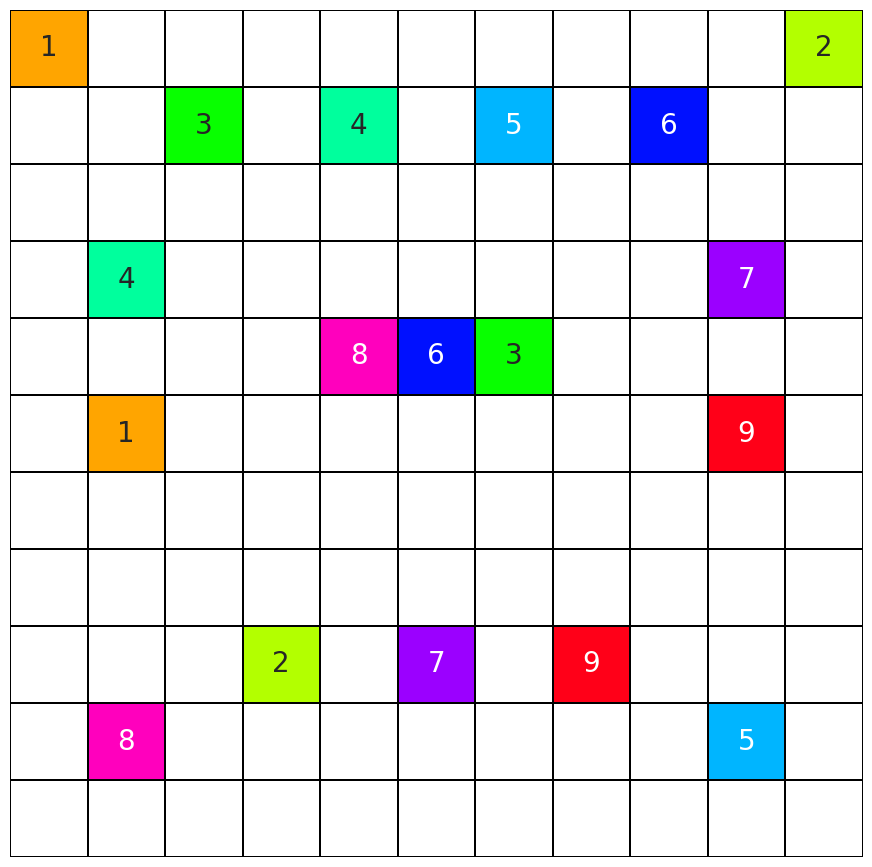

In [9]:
# Sample puzzle 5 (11x11)
paper = np.array(
          [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
           [0, 0, 3, 0, 4, 0, 5, 0, 6, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 4, 0, 0, 0, 0, 0, 0, 0, 7, 0],
           [0, 0, 0, 0, 8, 6, 3, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 2, 0, 7, 0, 9, 0, 0, 0],
           [0, 8, 0, 0, 0, 0, 0, 0, 0, 5, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
        )
puzzle5 = Numberlink(paper)

# Print the dimensions of puzzle
print("Puzzle of dimensions", puzzle5.shape)
# Display the puzzle paper
showPaper(puzzle5)

---
## Solution based on Backtracking

### Goal Test Predicates

Consider the Numberlink puzzle as a problem similar to the map coloring problem -- we need to try to color the whole "map" with colors. But in Numberlink, the **goals** change to:
1. No number is positioned within the path of any line.
    - i.e. If a grid is an end-point with a specific color (number) `k`, **EXACTLY one** of its neighboring grids can also be colored as `k`.
2. Lines do not branch or intersect.
    - i.e. If a grid is NOT an end-point, it can be colored as `k` only if **EXACTLY two** of its neighboring grids are also colored as `k`.

In [10]:
# Goal testing function
def isSolved(puzzle: Numberlink):
    ''' Check if the puzzle is solved (test the goal predicates)
        puzzle: A Numberlink puzzle
        return: True if the puzzle is solved, False otherwise
    '''
    (height, width) = puzzle.shape

    # Traverse the entire paper and test each cell against the goal predicates
    for i in range(height):
        for j in range(width):
            pos = (i, j)
            k = puzzle.paper[pos]
            count = 0

            # If pos is an end-point, check if count of neighbors
            # with the same color k is exactly 1
            if pos in puzzle.ends[k]:
                for direction in DIRECTIONS:
                    neighbor = getNeighborPos(pos, direction)

                    # Skip if neighbor is out of border
                    if not isInBorder(neighbor, puzzle.shape):
                        continue

                    # Count the neighbors with the same color k
                    if puzzle.paper[neighbor] == k:
                        count += 1
                if count != 1:
                    return False

            # Else (pos is not an end-point), check if count of
            # neighbors with the same color k is exactly 2
            else:
                for direction in DIRECTIONS:
                    neighbor = getNeighborPos(pos, direction)
                    if not isInBorder(neighbor, puzzle.shape):
                        continue
                    if puzzle.paper[neighbor] == k:
                        count += 1
                if count != 2:
                    return False
    return True

### Backtracking Search

In [11]:
# Solve the puzzle using backtracking search
def solve1(puzzle: Numberlink, pos: Tuple[int, int]) -> bool:
    ''' solve1 tries to solve the Numberlink puzzle using backtracking
        puzzle: A Numberlink puzzle
        return: True if the puzzle is solved, False if impossible to solve
    '''
    (height, width) = puzzle.shape
    (x, y) = pos

    # If we have reached the end, check if the puzzle is solved
    if x >= height or y >= width:
        return isSolved(puzzle)
    
    # If the current position has been filled, skip to the next position
    if puzzle.paper[pos] != 0:
        return solve1(puzzle, getNextPos(width, pos))
    
    # Try filling each possible number into the current position
    for k in range(1, puzzle.nNumber+1):
        puzzle.paper[pos] = k
        if solve1(puzzle, getNextPos(width, pos)):
            return True # If the puzzle is solved, no need for further search
        puzzle.paper[pos] = 0
    
    return False

Solved


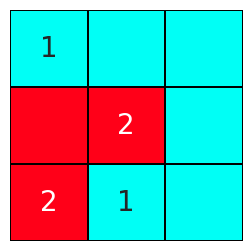

In [12]:
# Test the backtracking search with sample puzzles
puzzle = puzzle1
if solve1(puzzle, (0, 0)):
    print("Solved")
    showPaper(puzzle)
else:
    print("Impossible to solve")

Solved


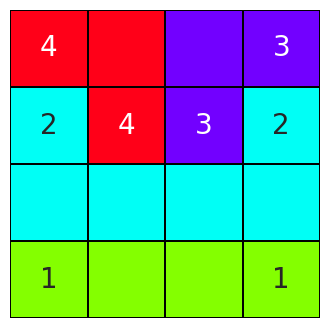

In [13]:
puzzle = puzzle2
if solve1(puzzle, (0, 0)):
    print("Solved")
    showPaper(puzzle)
else:
    print("Impossible to solve")

---
## Solution based on Constraint Propagation

### Constraints
Since the coloring to a specific grid will ONLY affect the constraint testing results of its neighboring grids, we can simply port the goal testing predicates in the previous solution to here with minuscule changes:
1. No number is positioned within the path of any line.
    - i.e. If a grid is an **end-point** with a specific color (number) `k` and has **four filled neighbors** (including borders), **EXACTLY one** of its neighboring grids can also be colored as `k`.
2. Lines do not branch or intersect.
    - i.e. If a **non-empty** grid is **NOT an end-point** and has **four filled neighbors** (including borders), it can be colored as `k` only if **EXACTLY two** of its neighboring grids are also colored as `k`.

In [14]:
# Constraint checking function
def isSafe(puzzle: Numberlink, pos: Tuple[int, int]) -> bool:
    ''' Check if the coloring `k` to `pos` satisfies the constraints
        puzzle: A Numberlink puzzle
        pos: Position to be colored
        return: True if the puzzle is safe, False otherwise
    '''

    # Get the immediate neighbors (neighbor1) of the current position
    for dir1 in DIRECTIONS:
        neighbor1 = getNeighborPos(pos, dir1)
        if not isInBorder(neighbor1, puzzle.shape):
            continue
        
        # If the immediate neighbor is empty, skip
        neighbor1_k = puzzle.paper[neighbor1]
        if neighbor1_k == 0:
            continue
        
        # If the immediate neighbor is an end-point and has exactly
        # 4 filled neighbor grids (including border), check if count
        # of its neighbors with the same color is exactly 1
        count = 0
        neighbor2_count = countNeighbors(puzzle, neighbor1)
        if neighbor1 in puzzle.ends[neighbor1_k] and neighbor2_count == 4:
            for dir2 in DIRECTIONS:
                neighbor2 = getNeighborPos(neighbor1, dir2)
                if not isInBorder(neighbor2, puzzle.shape):
                    continue
                if puzzle.paper[neighbor2] == neighbor1_k:
                    count += 1
            if count != 1:
                return False
        
        # If the immediate neighbor is NOT an end-point has exactly
        # 4 neighbor grids (including border), check if count of 
        # its neighbors with the same color is exactly 2
        elif neighbor2_count == 4:
            for dir2 in DIRECTIONS:
                neighbor2 = getNeighborPos(neighbor1, dir2)
                if not isInBorder(neighbor2, puzzle.shape):
                    continue
                if puzzle.paper[neighbor2] == neighbor1_k:
                    count += 1
            if count != 2:
                return False
    return True

### Constraint Propagation Search

In [15]:
# Solve the puzzle using constraint propagation search
def solve2(puzzle: Numberlink, pos: Tuple[int, int]) -> bool:
    ''' Solve the Numberlink `puzzle` using constraint propagation
        puzzle: A Numberlink puzzle
        return: True if the puzzle is solved, False if impossible to solve
    '''
    (height, width) = puzzle.shape
    (x, y) = pos

    # If we have reached out of the bound, the puzzle is solved
    if x >= height or y >= width:
        return True
    
    # If the current position has been filled, skip to the next position
    if puzzle.paper[pos] != 0:
        return solve2(puzzle, getNextPos(width, pos))
    
    # Try filling each possible number into the current position
    for k in range(1, puzzle.nNumber+1):
        puzzle.paper[pos] = k
        # If filling the number k won't violate any constraints, proceed to the next position
        if isSafe(puzzle, pos) and solve2(puzzle, getNextPos(width, pos)):
            return True
        puzzle.paper[pos] = 0
    return False

Solved


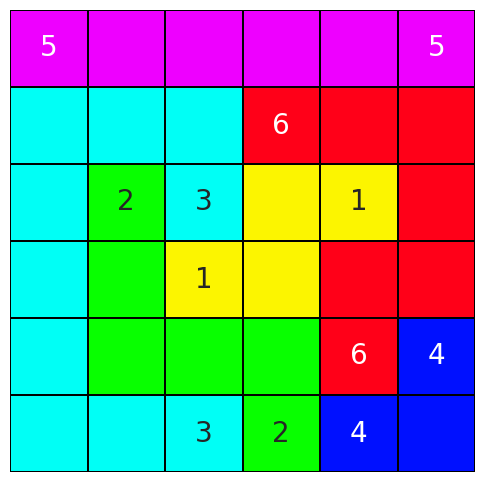

In [16]:
# Test the constraint propagation search with sample puzzles
puzzle = puzzle3
if solve2(puzzle, (0, 0)):
    print("Solved")
    showPaper(puzzle)
else:
    print("Impossible to solve")

Solved


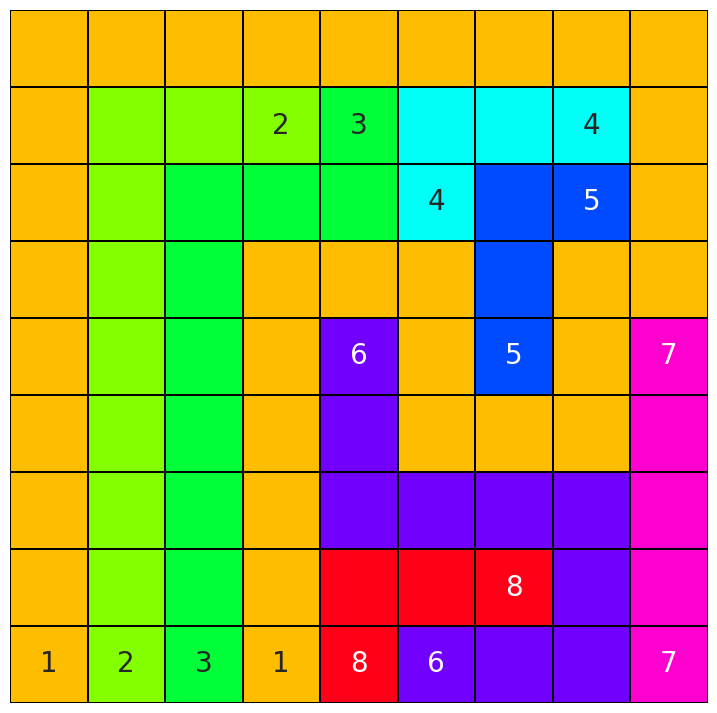

In [17]:
puzzle = puzzle4
if solve2(puzzle, (0, 0)):
    print("Solved")
    showPaper(puzzle)
else:
    print("Impossible to solve")

Solved


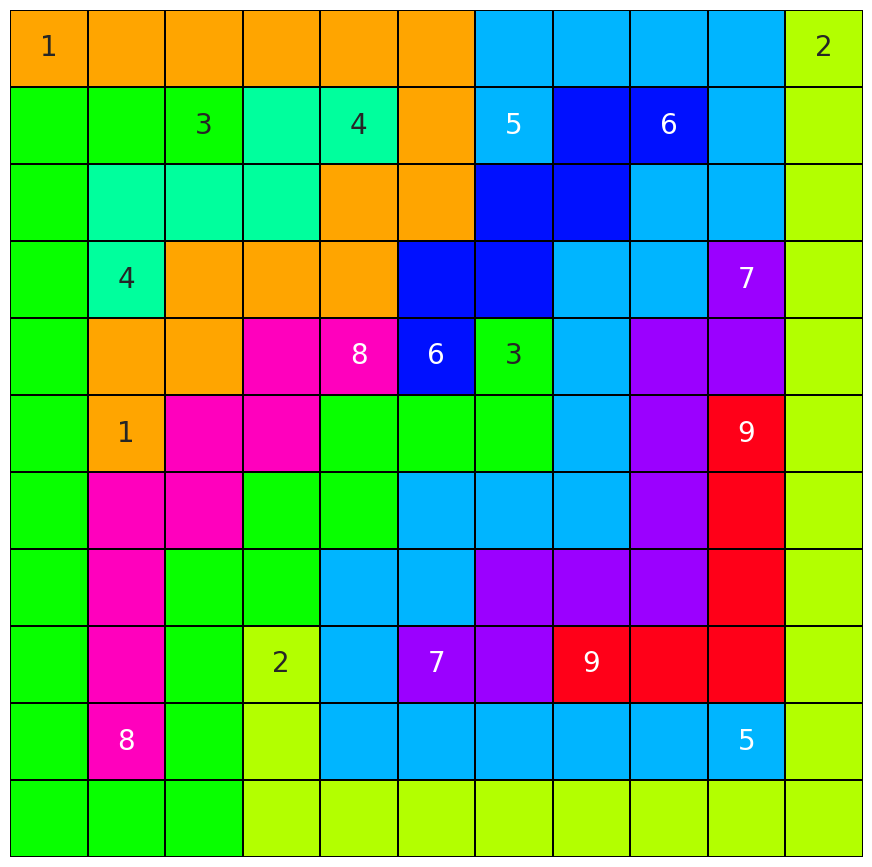

In [18]:
puzzle = puzzle5
if solve2(puzzle, (0, 0)):
    print("Solved")
    showPaper(puzzle)
else:
    print("Impossible to solve")